<a href="https://colab.research.google.com/github/jenny005/Machine-Learning/blob/master/IceCreamProduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

In [26]:
from google.colab import files
uploaded=files.upload()


Saving ice_cream.csv to ice_cream (1).csv


In [27]:
df_ice_cream = pd.read_csv('ice_cream.csv')

In [28]:
df_ice_cream.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [30]:
#rename columns to something more understandable
df_ice_cream.rename(columns={'DATE':'date', 'IPN31152N':'production'}, inplace=True)

In [31]:
df_ice_cream

,date,production
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636
...,...,...
572,2019-09-01,100.1741
573,2019-10-01,90.1684
574,2019-11-01,79.7223
575,2019-12-01,75.7094


In [32]:
#convert date column to datetime type
df_ice_cream['date'] = pd.to_datetime(df_ice_cream.date)

In [33]:
# set data as index
df_ice_cream.set_index('date',inplace=True)

In [35]:
#just get data from 2010 onwards
start_date=pd.to_datetime('2010-01-01')
df_ice_cream=df_ice_cream[start_date:]

In [36]:
df_ice_cream

,production
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576
...,...
2019-09-01,100.1741
2019-10-01,90.1684
2019-11-01,79.7223


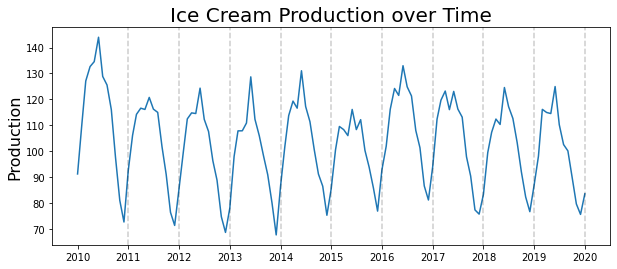

In [38]:
plt.figure(figsize=(10,4))
plt.plot(df_ice_cream.production)
plt.title('Ice Cream Production over Time', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(2011,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

ACF

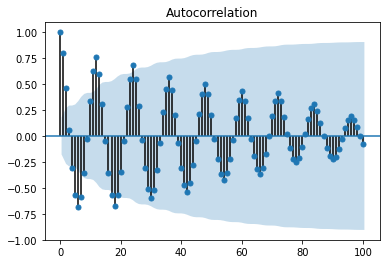

In [39]:
acf_plot=plot_acf(df_ice_cream.production,lags=100)

Based on decaying ACF, we are likely dealing with an Auto Regression process

For MA(moving average) process,we would have got a different signature. We would get a few strong lags and then it would just shut off here. Let's plot the PCAF plot for the further evidence

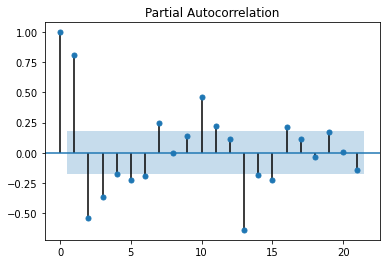

In [40]:
pacf_plot=plot_pacf(df_ice_cream.production)

# **On Stock Data**

we get this strong lag at one, the first one is at lag zero, it just the time series with itself. Based on PACF, we should start with an Auto Regression model with lags 1,2,3, 10,13

In [46]:
pip install yfinance

     |████████████████████████████████| 5.5MB 5.6MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22618 sha256=633f3a3f339360df212092ff7dc2d00294bbdb0bb78a50c3150e4c8033253aa9
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [65]:
import yfinance as yf

In [85]:
#define the ticker symbol
tickerSymbol = 'XOM'

In [90]:
#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

In [94]:
#get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2015-1-1', end='2020-11-15')

In [95]:
tickerDf = tickerDf[['Close']]

In [96]:
tickerDf

,Close
Date,
2015-01-02,70.862823
2015-01-05,68.923904
2015-01-06,68.557472
2015-01-07,69.252136
2015-01-08,70.404800
...,...
2020-11-09,36.060001
2020-11-10,36.860001
2020-11-11,36.480000


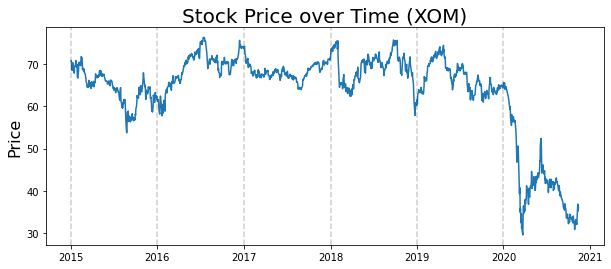

In [97]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.Close)
plt.title('Stock Price over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

***Stationarity: take first difference of this series***

In [98]:
# take first difference
first_diffs=tickerDf.Close.values[1:]-tickerDf.Close.values[:-1]
first_diffs=np.concatenate([first_diffs,[0]])

In [99]:
#set first difference as variable in dataframe
tickerDf['FirstDifference']=first_diffs

In [81]:
tickerDf

,Close,FirstDifference
Date,,
2015-01-02,183.525574,-3.314407
2015-01-05,180.211166,-1.697418
2015-01-06,178.513748,2.224518
2015-01-07,180.738266,3.207199
2015-01-08,183.945465,-1.474045
...,...,...
2019-12-24,316.685272,1.685791
2019-12-26,318.371063,-0.078888
2019-12-27,318.292175,-1.754791


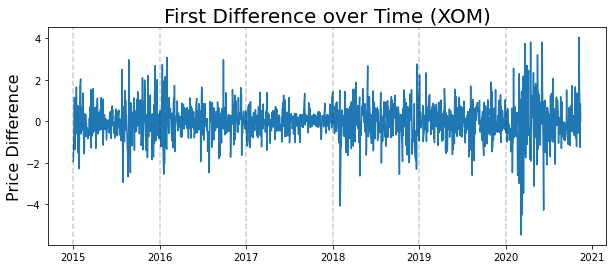

In [100]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.FirstDifference)
plt.title('First Difference over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price Difference', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

**ACF**

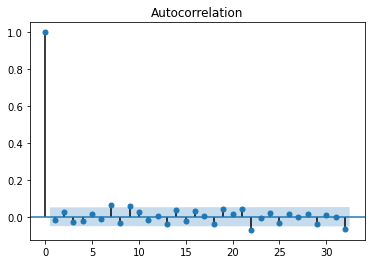

In [101]:
acf_plot=plot_acf(tickerDf.FirstDifference)

**ACF isn't that informative**

**PACF**

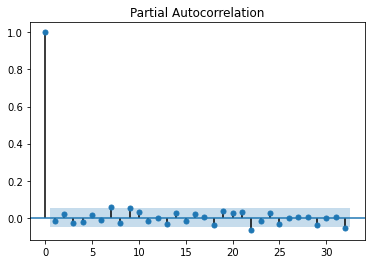

In [102]:
pacf_plot=plot_pacf(tickerDf.FirstDifference)

**PACF also doesn't tell us much**